<h1 align=center><b>Capítulo 10</b></h1>
<h1 align=center>Próximos passos<h1>

Até agora, exploramos várias ferramentas e técnicas sobre web scraping através do uso da linguagem de programação Python.

*Web scraping*, ou *web harvesting*, é feito para extrair e coletar dados de sites. *Webscraping* é útil em termos de desenvolvimento de modelos, que exige que os dados sejam coletados em tempo real que sejam verdadeiros, relevantes para o tópico, e preciso. Isso é desejável, pois leva menos tempo em comparação com a implementação de conjuntos de dados. Os dados coletados são armazenados em vários formatos, como JSON, CSV, XML e outros, são gravados em bancos de dados para uso posterior e também são disponibilizados online como conjuntos de dados.

Os sites também fornecem APIs da web com uma interface de usuário para interagir com informações na web. Esses dados podem ser usados para pesquisa, análise, marketing, **modelos de aprendizado de máquina (ML)**, construção de informações, descoberta de conhecimento e muito mais no campo da ciência da computação, gerenciamento, medicina e muito mais. Também podemos realizar análises nos dados obtidos por meio de APIs e conjuntos de dados disponíveis publicamente ou gratuitamente e gerar um resultado, mas esse processo não é classificado como web scraping.

Neste capítulo, aprenderemos sobre tópicos aplicáveis a dados coletados ou extraídos e aprenderemos sobre alguns conceitos avançados que valem a pena conhecer do ponto de vista de informações e carreira:
* Gerenciando dados raspados
* Análise e visualização usando pandas e matplotlib
* ML
* Mineração de dados
* Qual é o próximo?

### Gerenciando dados raspados
Nesta seção, exploraremos algumas ferramentas e aprenderemos mais sobre como lidar e gerenciar os dados que extraímos ou extraímos de determinados sites.

Os dados coletados de sites usando scripts de raspagem são conhecidos como dados brutos. Esses dados podem exigir que algumas tarefas adicionais sejam executadas em cima deles antes que possam ser processadas para que possamos obter uma visão sobre eles. Portanto, os dados brutos devem ser verificados e processados (se necessário), o que pode ser feito da seguinte forma:

* **Cleaning (Limpeza)**: como o nome sugere, esta etapa é usada para remover informações indesejadas, como caracteres de espaço e espaço em branco, e partes indesejadas do texto. O código a seguir mostra algumas etapas relevantes. Funções como `sub()` (ou seja, `re.sub()`), `strip()` e `replace()` são usadas em muitos lugares e também podem ser usadas para fins de limpeza:


`dealerInfo = re.split(r'\<br>', re.sub(r'\<br>\<br>', '', dealer))`
`stock = list(map(lambda stock:stock.strip(),availability))`
`availability = stockPath(row)[0].strip()`
`article['lastUpdated'] = article['lastUpdated'].replace('This page was last edited on', '')`
`title = row.find(attrs={'itemprop':'text'}).text.strip()`
`re.sub(r'or\s*','',fortran)`
`dealerInfo = re.split(r'\<br>',re.sub(r'\<br>\<br>','',dealer))`

* **Formatação**: Esta etapa é utilizada para obter o formato desejado dos dados. Por exemplo, podemos exigir casas decimais fixas no preço recebido, podemos precisar converter ou arredondar grandes valores flutuantes em casas decimais fixas, dividir grandes strings em unidades menores,
e mais e, em seguida, gravá-los em conjuntos de dados. Também pode haver casos em que números decimais ou inteiros são extraídos como strings e precisam ser formatados. Normalmente, converter tipos de dados e apresentar dados é considerado formatação:

In [46]:
price = 1234.567801
newprice = round(price,2)
print(newprice)

1234.57


In [47]:
totalsum="200.35"
print(type(totalsum))

<class 'str'>


In [48]:
#For large precision use: https://docs.python.org/2/library/decimal.html
totalsum = float(totalsum)
print(type(totalsum))

<class 'float'>


In [49]:
totalsum

200.35

In [50]:
ratings = 5.5
print(int(ratings))

5


> Essas etapas adicionais também podem ser executadas nos scripts enquanto extraímos dados específicos, e isso foi feito nos exemplos que vimos ao longo do livro. Em muitos casos, a limpeza e a formatação funcionam em conjunto ou são feitas lado a lado.

### Gravando em arquivos
Você deve ter notado que, na maioria desses exemplos, usamos um conjunto de dados (um objeto de lista do Python que foi usado para coletar dados) que foi anexado com vários campos em uma lista do Python, conforme mostrado no código a seguir:
<code>
dataSet.append([year,month,day,game_date,team1,team1_score,team2,team2_score,game_status])
..
dataSet.append([title,price,availability,image.replace('../../../..',baseUrl),rating.replace('star-rating ','')])
...
dataSet.append([link, atype, adate, title, excerpt,",".join(categories)])
...
dataSet.append([titleLarge, title, price, stock, image, starRating.replace('star-rating ', ''), url])
</code>

Com a disponibilidade de tal conjunto de dados, podemos gravar essas informações em arquivos externos, bem como no banco de dados. Antes de gravarmos o conjunto de dados nos arquivos, são necessários nomes de coluna que descrevem os dados do conjunto de dados. Considere o código a seguir, onde `keys` é uma lista separada contendo um título de string, ou seja, o nome das colunas para o respectivo item da lista anexado ao conjunto de dados:
<code>
keys = ['year','month','day','game_date','team1', 'team1_score', 'team2','team2_score', 'game_status']
......
dataSet.append([year,month,day,game_date,team1,team1_score,team2,team2_score,game_status])
</code>

Vamos considerar o exemplo a seguir, que contém `colNames` com a coluna a ser usada e `dataSet` com os dados limpos e formatados:

In [51]:
import csv
import json
colNames = ['Title','Price','Stock','Rating']
dataSet= [['Rip it Up and ...', 35.02, 'In stock', 5],
          ['Our Band Could Be ...',57.25, 'In stock', 4],
          ['How Music Works', 37.32, 'In stock', 2],
          ['Love Is a Mix ...', 18.03, 'Out of stock',1],
          ['Please Kill Me: The ...', 31.19, 'In stock', 4],
          ["Kill 'Em and Leave: ...",45.0, 'In stock',5],
          ['Chronicles, Vol. 1', 52.60, 'Out of stock',2],
          ['This Is Your Brain ...', 38.4,'In stock',1],
          ['Orchestra of Exiles: The ...', 12.36, 'In stock',3],
          ['No One Here Gets ...',20.02, 'In stock',5],
          ['Life', 31.58, 'In stock',5],
          ['Old Records Never Die: ...', 55.66, 'Out of Stock',2],
          ['Forever Rockers (The Rocker ...', 28.80, 'In stock',3]]

Agora vamos escrever o `dataSet` anterior no arquivo CSV. A primeira linha do arquivo CSV deve sempre conter os nomes das colunas. Nesse caso, usaremos `colNames` para as colunas:

In [52]:
fileCsv = open('bookdetails.csv', 'w', newline='', encoding='utf-8')
writer = csv.writer(fileCsv) #csv.writer object created
writer.writerow(colNames) #write columns from colNames
for data in dataSet: #iterate through dataSet and write to file
    writer.writerow(data)
fileCsv.close() #closes the file handler

In [53]:
import pandas as pd
pd.read_csv('bookdetails.csv')

,Title,Price,Stock,Rating
0,Rip it Up and ...,35.02,In stock,5
1,Our Band Could Be ...,57.25,In stock,4
2,How Music Works,37.32,In stock,2
3,Love Is a Mix ...,18.03,Out of stock,1
4,Please Kill Me: The ...,31.19,In stock,4
5,Kill 'Em and Leave: ...,45.00,In stock,5
6,"Chronicles, Vol. 1",52.60,Out of stock,2
7,This Is Your Brain ...,38.40,In stock,1
8,Orchestra of Exiles: The ...,12.36,In stock,3
9,No One Here Gets ...,20.02,In stock,5


Da mesma forma, vamos criar um arquivo JSON com `colNames` e `dataSets`. JSON é semelhante ao dicionário Python, onde cada dado ou valor possui uma chave; ou seja, existe em um par chave-valor:

In [54]:
finalDataSet=list() #empty DataSet
for data in dataSet:
    finalDataSet.append(dict(zip(colNames,data)))
print(finalDataSet)

[{'Title': 'Rip it Up and ...', 'Price': 35.02, 'Stock': 'In stock', 'Rating': 5}, {'Title': 'Our Band Could Be ...', 'Price': 57.25, 'Stock': 'In stock', 'Rating': 4}, {'Title': 'How Music Works', 'Price': 37.32, 'Stock': 'In stock', 'Rating': 2}, {'Title': 'Love Is a Mix ...', 'Price': 18.03, 'Stock': 'Out of stock', 'Rating': 1}, {'Title': 'Please Kill Me: The ...', 'Price': 31.19, 'Stock': 'In stock', 'Rating': 4}, {'Title': "Kill 'Em and Leave: ...", 'Price': 45.0, 'Stock': 'In stock', 'Rating': 5}, {'Title': 'Chronicles, Vol. 1', 'Price': 52.6, 'Stock': 'Out of stock', 'Rating': 2}, {'Title': 'This Is Your Brain ...', 'Price': 38.4, 'Stock': 'In stock', 'Rating': 1}, {'Title': 'Orchestra of Exiles: The ...', 'Price': 12.36, 'Stock': 'In stock', 'Rating': 3}, {'Title': 'No One Here Gets ...', 'Price': 20.02, 'Stock': 'In stock', 'Rating': 5}, {'Title': 'Life', 'Price': 31.58, 'Stock': 'In stock', 'Rating': 5}, {'Title': 'Old Records Never Die: ...', 'Price': 55.66, 'Stock': 'Out o

Como podemos ver, `finalDataSet` é formado anexando dados de `dataSet` e usando a função Python `zip()`. `zip()` combina cada elemento individual da lista. Este objeto compactado é então convertido em um dicionário Python. Por exemplo, considere o seguinte código:

`#primeira iteração do loop acima dict(zip(colNames,data)) irá gerar`
`{'Rating': 5, 'Title': 'Rip it Up and ...', 'Price': 35.02, 'Stock': 'In stock'}`

Agora, com o `finalDataSet` disponível, podemos despejar ou adicionar os dados a um arquivo JSON usando a função `dump()` do módulo `json`:

In [55]:
with open('bookdetails.json', 'w') as jsonfile:
    json.dump(finalDataSet,jsonfile)

Nesta seção, cobrimos as etapas básicas para gerenciar dados brutos. Os arquivos que obtivemos podem ser compartilhados e trocados facilmente entre vários sistemas independentes, usados como modelos para ML e podem ser importados como fontes de dados em aplicativos. Além disso, também podemos usar sistemas de **gerenciamento de banco de dados (DBMS)**, como MySQL, PostgreSQL e outros, para armazenar dados e executar a **linguagem de consulta estruturada (SQL)** usando as bibliotecas Python necessárias.



### Análise e visualização usando pandas e matplotlib

Nesta seção, exploraremos alguns conceitos básicos em relação à análise de dados usando pandas e plotagem de gráficos gerais usando matplotlib.

**pandas** é uma das bibliotecas de análise de dados mais populares nos últimos tempos. A análise e visualização de dados são tarefas importantes e podem ser realizadas com a ajuda de **pandas** e outras bibliotecas, como **matplotlib**.

> Para mais detalhes e documentação sobre pandas e matplotlib, visite seu sites oficiais em https://pandas.pydata.org/ e https://matplotlib.org/.

**pandas** também é denominado e usado como uma planilha bruta. Ele suporta declarações matemáticas, estatísticas e do tipo consulta, e permite que você leia de e gravar em vários arquivos. Também é popular entre desenvolvedores e analistas, pois possui funções fáceis e propriedades disponíveis que podem ajudá-lo lidar com dados que estão em uma estrutura de linha e coluna:

In [56]:
import pandas
print(dir(pandas))

['BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__deprecated_num_index_names', '__dir__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_is_numpy_dev', '_libs', '_testing', '_typing', '_version', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'concat

Nesta seção, leremos os dados do arquivo `bookdetails.csv` e realizaremos a análise e a visualização usando os dados do arquivo. Vamos importar as bibliotecas necessárias, ou seja, `pandas` e `matplotlib.pyplot`. Estaremos usando os aliases `pd` e `plt`, respectivamente, e lendo os dados do arquivo:

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
dataSet = pd.read_csv('bookdetails.csv') #loads the file content as dataframe.
print(type(dataSet)) #<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


Como podemos ver, a função `read_csv()` lê o conteúdo de um arquivo CSV e gera um objeto DataFrame. pandas também suporta vários arquivos de dados através do uso de funções como `read_html()`, `read_excel()`, `read_json()` e `read_sql_table()`. Aqui, `dataSet` é um objeto do DataFrame pandas. O DataFrame representa uma estrutura tabular bidimensional com linhas, colunas e índices. Análise em nível de consulta, instruções condicionais, filtragem, agrupamento e muito mais são compatíveis com DataFrames em relação a dados em linhas e colunas:

In [58]:
print(dataSet)

                              Title  Price         Stock  Rating
0                 Rip it Up and ...  35.02      In stock       5
1             Our Band Could Be ...  57.25      In stock       4
2                   How Music Works  37.32      In stock       2
3                 Love Is a Mix ...  18.03  Out of stock       1
4           Please Kill Me: The ...  31.19      In stock       4
5           Kill 'Em and Leave: ...  45.00      In stock       5
6                Chronicles, Vol. 1  52.60  Out of stock       2
7            This Is Your Brain ...  38.40      In stock       1
8      Orchestra of Exiles: The ...  12.36      In stock       3
9              No One Here Gets ...  20.02      In stock       5
10                             Life  31.58      In stock       5
11       Old Records Never Die: ...  55.66  Out of Stock       2
12  Forever Rockers (The Rocker ...  28.80      In stock       3


Os índices de linha também são mostrados, todos começando com 0 (zero). A saída estatística geral pode ser obtida usando a função `describe()`:

In [59]:
print(dataSet.describe())

           Price     Rating
count  13.000000  13.000000
mean   35.633077   3.230769
std    14.239014   1.535895
min    12.360000   1.000000
25%    28.800000   2.000000
50%    35.020000   3.000000
75%    45.000000   5.000000
max    57.250000   5.000000


In [60]:
print(dataSet['Price'].describe())

count    13.000000
mean     35.633077
std      14.239014
min      12.360000
25%      28.800000
50%      35.020000
75%      45.000000
max      57.250000
Name: Price, dtype: float64


Como podemos ver, por padrão, `describe()` seleciona as colunas aplicáveis às funções estatísticas e retorna cálculos com as seguintes funções:
* `count`: número de linhas
* `mean`: valor médio para a coluna relacionada
*`min`: valor mínimo encontrado
* `max`: valor máximo encontrado
* `std`: Desvio padrão calculado
* `25%`: retorna o percentil 25
* `50%`: retorna o percentil 50
* `75%`: retorna o percentil 75

No código a seguir, estamos selecionando uma coluna individual chamada `Price` como `price_group`. Todas as colunas do conjunto de dados podem ser listadas usando `dataSet.columns`. Várias colunas podem ser selecionadas usando o seguinte formato `dataSet[['Price','Rating']]`:

In [61]:
print(dataSet.columns)

Index(['Title', 'Price', 'Stock', 'Rating'], dtype='object')


In [62]:
print(sum(dataSet['Price']))

463.22999999999996


In [63]:
print(sum(dataSet['Rating']))

42


In [64]:
print(dataSet['Price'][0:5])

0    35.02
1    57.25
2    37.32
3    18.03
4    31.19
Name: Price, dtype: float64


In [65]:
price_group = dataSet[['Price']]
print(price_group)

    Price
0   35.02
1   57.25
2   37.32
3   18.03
4   31.19
5   45.00
6   52.60
7   38.40
8   12.36
9   20.02
10  31.58
11  55.66
12  28.80


O pandas DataFrames também aceita condições ou ações de filtragem sendo usadas em colunas. Como você pode ver, o filtro é aplicado à `Rating` para valores` >=4.0`, e apenas `Title` e `Price` serão retornados:

In [66]:
print(dataSet[dataSet['Rating']>=4.0][['Title','Price']])

                      Title  Price
0         Rip it Up and ...  35.02
1     Our Band Could Be ...  57.25
4   Please Kill Me: The ...  31.19
5   Kill 'Em and Leave: ...  45.00
9      No One Here Gets ...  20.02
10                     Life  31.58


Da mesma forma, filtros baseados em string também podem ser aplicados. O `stock`, que contém o texto de `Out`, é filtrado e a saída retorna todas as colunas que atendem ao texto de `Out`. A função `contains()` aceita expressões regulares e strings:

In [67]:
print(dataSet[dataSet.Stock.str.contains(r'Out')])

                         Title  Price         Stock  Rating
3            Love Is a Mix ...  18.03  Out of stock       1
6           Chronicles, Vol. 1  52.60  Out of stock       2
11  Old Records Never Die: ...  55.66  Out of Stock       2


In [68]:
print(dataSet[dataSet.Stock.str.contains(r'Out')]['Price']) # Somente a Coluna <Price>

3     18.03
6     52.60
11    55.66
Name: Price, dtype: float64


A função `between()` é fornecida com valores que se referem a `Rating` para filtrar e retornar `Title` dos livros:

In [69]:
print(dataSet[dataSet.Rating.between(3.5,4.5)]['Title'])

1      Our Band Could Be ...
4    Please Kill Me: The ...
Name: Title, dtype: object


Como temos os dados `price_group`, podemos chamar a função `plot()` nos dados com a ajuda da função `show()`:

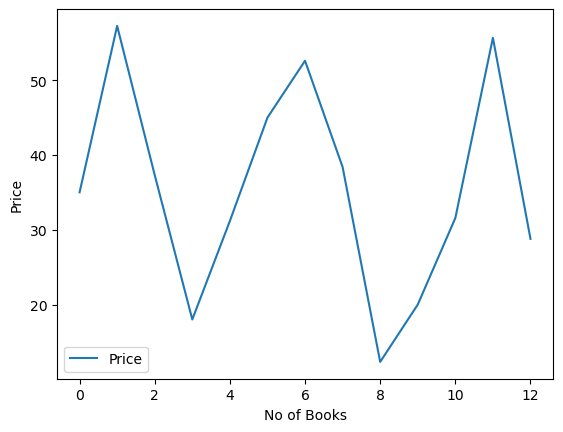

In [70]:
bar_plot = price_group.plot() #default plot
bar_plot.set_xlabel("No of Books") #set X axis: label
bar_plot.set_ylabel("Price") #set Y axis: label
plt.show() #displays the plot or chart created

Também podemos alterar o tipo de gráfico, ou seja, linha, barra e muito mais.

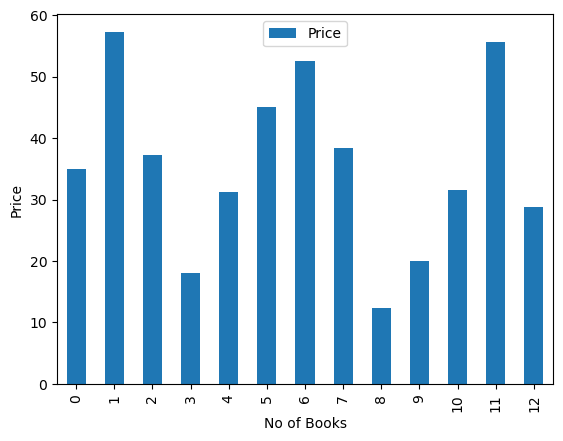

In [71]:
bar_plot = price_group.plot(kind='bar') #kind='bar'
bar_plot.set_xlabel("No of Books") #Label for X-Axis
bar_plot.set_ylabel("Price") #label for Y-Axis
plt.show()

Até agora, usamos um tipo de gráfico básico com uma única coluna. No código a seguir, estamos traçando um gráfico de barras com os valores `Price` e `Rating`:

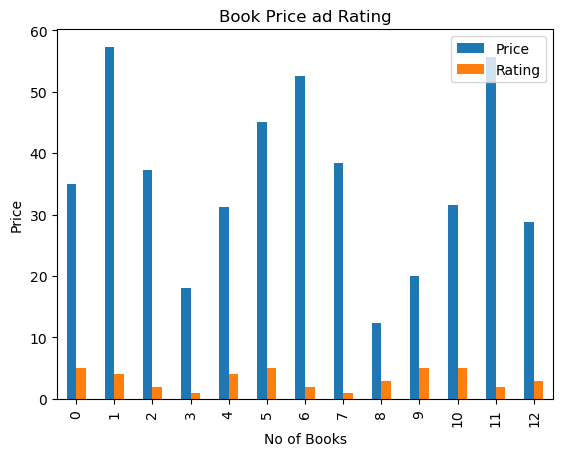

In [72]:
price_group = dataSet[['Price','Rating']] #obtain both columns
#title: generates a title for plot
bar_plot = price_group.plot(kind='bar',title="Book Price ad Rating")
bar_plot.set_xlabel("No of Books")
bar_plot.set_ylabel("Price")
plt.show()

Até agora, traçamos com sucesso gráficos de linhas e barras. O código a seguir traça um gráfico de pizza para os seis primeiros itens da coluna `Price` e os rotula com os seis primeiros `Title` disponíveis em `dataSet`:

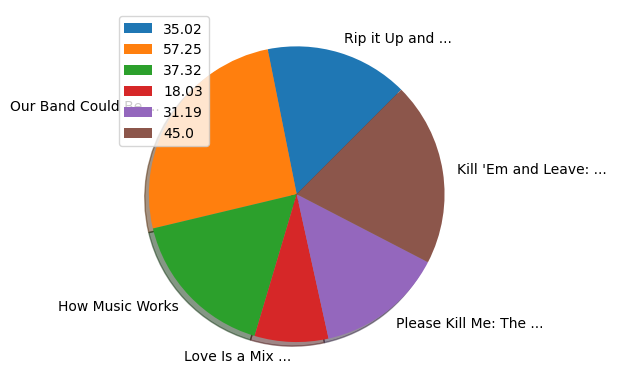

In [73]:
prices = dataSet['Price'][0:6] #Price from first 6 items
labels = dataSet['Title'][0:6] #Book Titles from first 6 items
legends,ax1 = plt.pie(prices, labels=labels, shadow=True, startangle=45)
plt.legend(legends, prices, loc="best") #legend built using Prices
plt.show()

Há muito mais para explorar em termos de uso de pandas e matplotlib. Nesta seção, exibimos os recursos básicos que estão disponíveis em ambas as bibliotecas. Agora, vamos olhar para o ML.

### Aprendizado de máquina
ML é um ramo da **inteligência artificial (IA)** que lida com o estudo de algoritmos matemáticos e estatísticos para processar e desenvolver um sistema automatizado que pode aprender com dados com o mínimo de envolvimento humano. As previsões de ML e os modelos de tomada de decisão dependem dos dados. O web scraping é um dos recursos que disponibiliza dados para modelos de ML.

Atualmente, muitos mecanismos de recomendação implementam ML para veicular anúncios e recomendações de marketing, como Google AdSense e AdWords em tempo real. O processo implementado no ML é semelhante ao da mineração de dados e da modelagem preditiva. Ambos os conceitos buscam padrões enquanto percorrem os dados e modificam as ações do programa de acordo com os requisitos. Portanto, o ML é uma ferramenta útil quando se trata de explorar o campo de negócios, marketing, varejo, preços de ações, vídeo vigilância, reconhecimento facial, diagnóstico médico, previsão do tempo, suporte ao cliente online, detecção de fraude online e muito mais.

Com algoritmos de ML novos e aprimorados, métodos de captura de dados e computadores e redes mais rápidos, o campo de ML está se acelerando.

### ML e IA
A IA é um amplo espectro que abrange uma ampla gama de tópicos, como redes neurais, sistemas especialistas, robótica, lógica difusa e muito mais. ML é um subconjunto de IA. Explora a ideia de construir uma máquina que aprende por conta própria, superando assim a necessidade de especulação constante. Portanto, o ML levou a um grande avanço para alcançar a IA.

O ML incorpora o uso de vários algoritmos, permitindo assim que o software forneça resultados precisos. Fazer uma previsão útil a partir de um conjunto de dados analisados é o que o conceito de ML pretende fazer. O principal benefício do ML é que ele pode aprender e prever incansavelmente sem a necessidade de um regime de software codificado. O treinamento inclui alimentar grandes conjuntos de dados como entrada. Isso permite que um algoritmo aprenda, processe e faça previsões, que são fornecidas como saída.

Vários parâmetros importantes são empregados ao medir o potencial de qualquer modelo. A precisão é um deles, e é um parâmetro importante para medir o sucesso de qualquer modelo desenvolvido. No ML, **80% de precisão é um sucesso**. Se o modelo tiver **80% de precisão**, estamos economizando **80% do nosso tempo** e **aumentando a produtividade**. No entanto, nem sempre é a melhor métrica para acessar modelos de classificação se os dados estiverem desbalanceados.

Em geral, a precisão é denominada como uma medida intuitiva. Ao empregar a precisão, o custo igual é atribuído a falsos positivos e falsos negativos. Para dados desequilibrados (como 94% caindo em uma instância e 6% em outra), há muitas maneiras excelentes de diminuir o custo; faça uma vaga previsão de que cada instância pertence à classe majoritária, prove que a precisão geral é de 94% e conclua a tarefa. Na mesma linha, surgem problemas se o que estamos falando, como uma doença, é raro e letal. O custo de não examinar adequadamente a doença de uma pessoa doente é maior do que o custo de empurrar um indivíduo saudável para mais testes.

Em suma, não há melhores métricas. É comum duas pessoas escolherem métricas diferentes para atingir seu objetivo.

### Python e ML
Um programador holandês (Guido Van Rossum) lançou o Python como seu projeto paralelo, mas não percebeu que isso aceleraria seu auge de sucesso.
O Python é amplamente adaptado entre os desenvolvedores quando se trata de prototipagem rápida. Está ganhando popularidade entre todas as ferramentas de ML disponíveis por sua legibilidade, versatilidade e facilidade.

Como engenheiros de ML, engenheiros de visão computacional, cientistas de dados ou engenheiros de dados, temos que fazer malabarismos com as ideias de álgebra linear e cálculo, que geralmente se tornam complexas quando mergulhamos mais fundo. No entanto, o Python vem em socorro com sua implementação rápida, contornando assim o obstáculo do esforço máximo. A validação rápida dessa ideia torna a linguagem de programação Python mais desejável.

Dados são tudo para o ML. Os dados brutos são não estruturados, grandes, incompletos e têm valores ausentes. A limpeza de dados é uma das etapas mais cruciais do ML para que possamos seguir em frente com nossos dados. Existem muitas bibliotecas essenciais disponíveis em Python que simplificam a implementação de ML. Vários repositórios de código aberto em Python ajudam a trazer mudanças ao método existente. A raspagem da Web é um desses métodos que lida com dados que existem na Web, que são processados posteriormente como entrada para modelos de ML.

A seguir estão algumas das bibliotecas mais comuns e amplamente usadas que valem a pena examinar se decidirmos trabalhar com Python e ML:
* **scikit-learn**: usado para trabalhar com algoritmos de ML clássicos
* **NumPy (Python numérico)**: Projetado para funcionar para computação científica
* **SciPy**: Contém módulos para álgebra linear, otimização, integração e estatísticas
* **pandas**: usado para agregação, manipulação e visualização de dados matplotlib e Seaborn: para visualização de dados
* **Bokeh** e **Plotly**: Para visualização interativa
* **TensorFlow** e **Theano**: usados para aprendizado profundo
* **Beautiful Soup**, **LXML**, **PyQuery** e **Scrapy**: Usado para retirar dados de documentos HTML e XML

Uma vez que tenhamos uma compreensão básica do Python, essas bibliotecas podem ser importadas e implementadas. Alternativamente, também podemos aplicar essas funcionalidades do zero, que é o que a maioria dos desenvolvedores faz.

Python requer menos escrita e depuração em termos de código, o que economiza tempo em comparação com outras linguagens de programação. Isso é exatamente o que os programadores de IA e ML querem: um foco na compreensão do aspecto arquitetônico, em vez de gastar todo o tempo na depuração. Assim, o Python pode ser facilmente manipulado por pessoas com menos conhecimento em programação devido à sintaxe que fornece legibilidade em nível humano.

Além do Python, existem várias outras ferramentas para ML, como Microsoft Excel, SAS, MATLAB e R. Essas ferramentas geralmente são negligenciadas devido à falta de serviços comunitários adequados e porque são incapazes de lidar com grandes conjuntos de dados. O MATLAB também fornece bibliotecas e pacotes sofisticados para processamento e análise de imagens. Em comparação com o Python, o tempo de execução é moderado e a funcionalidade é limitada à prototipagem, não à implantação.

R é outra ferramenta usada para análise estatística. O Python realiza a manipulação de dados fornecendo várias ferramentas de desenvolvimento que podem ser colaboradas com outros sistemas. No entanto, R só funciona em uma forma específica de conjunto de dados e, portanto, as funções predefinidas exigem a entrada predefinida. R fornece uma base primitiva para os dados, que Python nos permite explorar os dados.

### Tipos de algoritmos de ML
Em geral, existem três tipos de algoritmos de ML, conforme mostrado aqui:
* Aprendizagem supervisionada:
   * Classificação
   * Regressão
* Aprendizagem não supervisionada:
   * Associação
   * Agrupamento
* Aprendizado por reforço

### Aprendizado supervisionado

A aprendizagem supervisionada consiste em observar ou dirigir a execução de algo. A entrada fornecida ao modelo é a previsão que queremos fazer. Os dados rotulados são a previsão explícita dada para as instâncias particulares da entrada. O aprendizado supervisionado requer dados rotulados, o que requer alguma experiência. No entanto, nem sempre essas condições são atendidas. Nem sempre possuímos o conjunto de dados rotulado. Por exemplo, a previsão de fraudes é um dos campos de rápido desenvolvimento em que o invasor está constantemente procurando por exploits disponíveis. Esses novos ataques não podem ser mantidos em um conjunto de dados com ataques rotulados.

Matematicamente, as funções de mapeamento da entrada para a saída podem ser expressas como $Y = f(X)$. Aqui, Y é a variável de saída e X é a variável de entrada.

#### Classificação
A classificação determina ou categoriza um modelo com base em seus atributos, e é o processo de identificar o gênero ao qual pertence uma nova observação, conforme a categoria de pertinência, que é conhecida antecipadamente. É uma técnica para determinar a qual classe uma variável dependente pertence com base em uma ou mais variáveis independentes. A variável de saída no problema de classificação é um grupo ou uma categoria. Alguns exemplos incluem pontuação de crédito (diferenciando entre alto risco e baixo risco com base em ganhos e economias), diagnóstico médico (prever o risco de doença), publicidade na web (prever se um usuário clicará em anúncios ou não) e muito mais.

A capacidade do modelo de classificação pode ser determinada usando procedimentos de avaliação de modelo e métricas de avaliação de modelo.

**Procedimentos de avaliação do modelo**

Os procedimentos de avaliação do modelo ajudam você a descobrir quão bem um modelo se adaptará aos dados de amostra:
* **Treinando e testando os dados**: Os dados de treinamento são usados para treinar o modelo para que ele se ajuste ao parâmetro. Os dados de teste são um conjunto de dados mascarado para o qual uma previsão deve ser feita.
* **Treinar e testar divisão**: Normalmente, quando os dados são separados, a maioria dos dados é usada para treinamento, enquanto uma pequena parte dos dados é usada para teste.
* **Validação cruzada de K-fold**: K-train e divisões de teste são criadas e calculadas em média juntas. O processo é executado k vezes mais lento do que as divisões de treinamento e teste.

**Métricas de avaliação do modelo**

Métricas de avaliação de modelo são empregadas para quantificar o desempenho do modelo. As métricas a seguir podem ser implementadas para medir a capacidade de um modelo preditivo de classificação.

As métricas de avaliação são gerenciadas com a ajuda do seguinte:

* **Matriz de confusão**: Esta é uma matriz $\small 2 \times 2$, também conhecida como matriz de erro. Ele ajuda a visualizar o desempenho de um algoritmo – normalmente um de aprendizado supervisionado – com a ajuda de precisão de classificação, erro de classificação, sensibilidade, medidas de precisão e previsões. A escolha das métricas depende do objetivo do negócio. Portanto, é necessário identificar se falsos positivos ou falsos negativos podem ser reduzidos com base nos requisitos.
* **Regressão logística**: A regressão logística é um modelo estatístico que auxilia na análise do conjunto de dados. Possui diversas variáveis independentes que são responsáveis por determinar a saída. A saída é medida com variáveis diplóides (envolvendo dois resultados possíveis). O objetivo da regressão logística é encontrar o modelo de melhor ajuste para descrever a relação entre variáveis diplóides (variáveis dependentes) e um conjunto de variáveis independentes (preditores). Por isso, também é conhecido como um modelo de aprendizagem preditivo.
* **Naives Bayes**: Isso funciona no conceito de probabilidade condicional, como dado pelo teorema de Bayes. O teorema de Bayes calcula a probabilidade condicional de um evento com base no conhecimento prévio que possa haver em relação ao evento. Esta abordagem é amplamente utilizada no reconhecimento facial, diagnóstico médico, classificação de notícias e muito mais. O classificador **Naives Bayes** é baseado no teorema de **Bayes**, onde a probabilidade condicional de A dado B pode ser calculada da seguinte forma:

<code>
P(A | B) = ( P(B | A) * P( A ))/ P( B )

Given:
P(A | B) = Conditional probability of A given B
P(B | A) = Conditional probability of B given A
P( A )= Probability of occurrence of event A
P( B )= Probability of occurrence of event B
</code>


* **Árvore de decisão**: Uma árvore de decisão é um tipo de modelo de aprendizado supervisionado onde o resultado final pode ser visualizado na forma de uma árvore. A árvore de decisão inclui nós folha, nós de decisão e o nó raiz. O nó de decisão possui dois ou mais ramos, enquanto o nó folha representa a classificação ou decisão. A árvore de decisão divide ainda mais o conjunto de dados em subconjuntos menores, desenvolvendo assim de forma incremental a árvore associada. É simples de entender e pode lidar facilmente com conjuntos de dados categóricos e numéricos.
* **Algoritmo de floresta aleatória**: Este algoritmo é um algoritmo de ML supervisionado que é fácil de usar e fornece ótimos resultados, mesmo sem ajuste de hiperparâmetros. Devido à sua simplicidade, pode ser usado tanto para tarefas de regressão quanto de classificação. Ele pode lidar com conjuntos maiores de dados para manter os valores ausentes. Esse algoritmo também é considerado o melhor na execução de tarefas relacionadas à classificação em comparação com a regressão.
* **Rede neural**: embora já tenhamos algoritmos lineares e de classificação, uma rede neural é a técnica de última geração para muitos ML problemas. Uma rede neural é composta de unidades, ou seja, neurônios, que são organizados em camadas. Eles são responsáveis pela conversão de um vetor de entrada em alguma saída. Cada unidade recebe uma entrada, aplica uma função e passa a saída para a próxima camada. Normalmente, funções não lineares são aplicadas a este algoritmo.
* **Algoritmo Support Vector Machine (SVM)**: O algoritmo de aprendizado SVM é um modelo de ML supervisionado. Ele é usado tanto para classificação quanto para análise de regressão, e é amplamente conhecido como um problema de otimização restrita. O SVM pode se tornar mais poderoso usando o truque do kernel (linear, função de base radial, polinômio e sigmóide). No entanto, as limitações da abordagem SVM estão na seleção do kernel.

#### Regressão
A regressão é uma medida estatística que ajuda a estimar a relação entre as variáveis. Em geral, a classificação se concentra na previsão de um rótulo, enquanto a regressão se concentra na previsão de quantidade. A regressão é usada em finanças, investimentos e outras disciplinas pelos gerentes para avaliar seus ativos. Na mesma linha, tenta determinar a força da relação entre as variáveis dependentes e uma série de outras variáveis (variáveis independentes); por exemplo, a relação entre os preços das commodities e os negócios que lidam com essas commodities.

O modelo de regressão tem duas características principais. A variável de saída no problema de regressão é um valor real ou de natureza quantitativa. A reação do modelo leva em consideração dados passados. Matematicamente, um modelo preditivo mapeia a variável de entrada ($\small X$) para a variável de saída contínua ($\small Y$). Uma variável de saída contínua é um valor inteiro ou de ponto flutuante. A capacidade do modelo preditivo de regressão pode ser medida pelo cálculo da **raiz quadrada média do erro (RMSE)**. Por exemplo, no total, o modelo de previsão de regressão fez duas previsões, ou seja, 1.5 e 3.3, onde os valores esperados são 1.0 e 3.0. Portanto, o RMSE pode ser calculado da seguinte forma:
<code>
RMSE = sqrt(average(error\^2))
RMSE = sqrt(((1.0 - 1.5)\^2 + (3.0 - 3.3)\^2) / 2)
RMSE = sqrt((0.25 + 0.09) / 2)
RMSE = sqrt(0.17)
RMSE = 0.412
</code>

#### Aprendizado não supervisionado
O aprendizado não supervisionado é uma classe de técnicas de ML em que os dados fornecidos como entrada não são rotulados. Além disso, apenas as variáveis de entrada ($\small X$) são fornecidas, sem correspondência com as variáveis de saída ($\small Y$). No aprendizado não supervisionado, os algoritmos são deixados sozinhos para aprender e explorar por conta própria, sem expectativas iniciais reais. Essa ausência de rotulagem nos ensina sobre a reconstrução de dados de entrada usando representação ou incorporação. É benéfico quando se trata de mineração de dados e extração de recursos.

O aprendizado não supervisionado permite que você descubra tendências e padrões ocultos. Alguns exemplos do mundo real são prever ou entender dígitos manuscritos, tecnologia de fabricação de nano câmeras, espectro quântico Planck e muito mais.

Matematicamente, o aprendizado não supervisionado tem um valor de entrada ($\small X$) sem valor de saída correspondente. Em comparação com o aprendizado supervisionado, o processamento de tarefas do aprendizado não supervisionado é bastante complexo. A implementação do aprendizado não supervisionado pode ser encontrada em carros automáticos ou autônomos, programas de reconhecimento facial, sistemas especialistas, bioinformática e muito mais.
Associação e agrupamento são duas partes do aprendizado não supervisionado.
##### Associação
Essa é uma técnica usada para descobrir novos padrões em grandes conjuntos de dados. A associação é deliberada para identificar regras fortes de um conjunto de dados com base no grau de noticiabilidade. Durante a análise prolongada dos dados, mais novas regras são geradas.

A regra de associação é amplamente empregada na análise da cesta de mercado. Essa técnica ajuda a determinar a força da associação entre os pares do produto adquirido e a frequência de coocorrência nas observações. A análise da cesta de mercado é uma das técnicas de modelagem usadas pelos varejistas para descobrir associações entre itens. A teoria se desenvolve em torno do fato de que, se comprarmos alguns itens, é mais provável que compremos itens semelhantes.

Matematicamente, é representado como $P\small (A|B)$, onde uma pessoa que compra A também compra B. Também pode ser escrito como se $\small {A}$, então $\small {B}$. Em outras palavras, se há uma probabilidade de A ocorrer, então também há uma probabilidade de B ocorrer. Por exemplo, $\small P(leite | pão) = 0,7$.
##### Agrupamento

Cluster é a montagem de um objeto pertencente ao mesmo rótulo, tratado como um. Clustering é a técnica de agrupar um objeto em sua categoria correspondente. Isso inclui ordenar vários objetos em seus grupos particulares, onde a capacidade de associação é máxima se pertencer ao mesmo grupo, ou mínima, caso contrário.
Um dos algoritmos de agrupamento mais populares é o algoritmo de agrupamento k-means. Este algoritmo exige o valor predefinido de k. K representa o número de clusters em que queremos dividir os dados. O desempenho real é obtido quando o cluster é hiperesférico, como círculos em um espaço 2D ou esferas em um espaço 3D.
A principal vantagem do clustering é que ele ajuda a descobrir o recurso distinto e útil dos dados e é flexível a alterações.

##### Aprendizado por reforço
O aprendizado por reforço é uma parte do ML que lida com a tomada de ações necessárias para aumentar a recompensa de uma situação específica. Ele emprega vários softwares e máquinas para encontrar o melhor caminho possível para uma situação específica.

O aprendizado por reforço é diferente do aprendizado supervisionado. No aprendizado supervisionado, os dados de treinamento são fornecidos com um rótulo, com base no qual são treinados. No caso do aprendizado por reforço, o agente de reforço toma a decisão de resolver a tarefa que lhe foi atribuída. Existem dois tipos de aprendizado por reforço:
* **Reforço positivo**: Maximiza o desempenho e sustenta as mudanças por mais tempo
* **Reforço negativo**: Minimiza o desempenho e sustenta a mudança por um período mais curto

## Mineração de dados
O processo de descoberta de informações ocultas ou preditivas de grandes conjuntos de dados ou bancos de dados é conhecido como mineração de dados. A mineração de dados é uma forma de análise realizada em dados para descobrir novos padrões e fatos. Esses fatos são usados para descobrir conhecimento e também são considerados um passo para a descoberta de conhecimento em bancos de dados (KDD). Vários processos e etapas de IA, ML, estatísticas, sistemas de gerenciamento de banco de dados e muito mais são frequentemente combinados para buscar o novo padrão. Com volumes crescentes de dados e algoritmos de ML, sempre há uma tendência de encontrar fatos novos ou ocultos no banco de dados. Fatos e padrões encontrados ou pesquisados são usados para prever um determinado resultado e também podem ser aplicados em muitos campos, como estatísticas, visualização de dados, marketing, gerenciamento, médicos, sistemas de tomada de decisão e assim por diante.

A análise de dados e a mineração de dados são frequentemente comparadas ou discutidas em conjunto. A mineração de dados é considerada uma parte do processo de análise de dados. Precisaremos de algumas hipóteses predefinidas ao trabalhar com análise de dados, pois é o processo de organização de dados para desenvolver modelos e determinar alguns insights. Em termos de práticas aplicadas, a mineração de dados é realizada principalmente em dados estruturados, enquanto a análise de dados pode ser feita em dados estruturados, não estruturados ou semiestruturados.

A mineração de dados é baseada em métodos científicos e matemáticos, enquanto a análise de dados usa modelos analíticos e sistemas de inteligência. Ao olhar à distância, tanto a análise de dados quanto a mineração de dados são subconjuntos da ciência de dados, onde a mineração de dados implementa algoritmos preditivos para descobrir padrões e a análise de dados implementa atividades para obter alguns insights dos conjuntos de dados.

Um grande benefício da mineração de dados é poder processar grandes volumes de dados em um curto período de tempo. Ele também pode ser implementado em plataformas novas ou existentes, prever padrões ocultos ou ajudar a descobri-los, ajudar na tomada de decisões, descoberta de conhecimento e muito mais.

### Tarefas de mineração de dados
Em geral, as tarefas de mineração de dados são segregadas em dois tipos, também conhecidos como análise de mineração de dados ou modelagem de mineração de dados. Ambos podem ser categorizados ainda mais, como mostrado aqui:
* Preditivo:
  * Classificação
  * Regressão
  * Predição
* Descritivo:
  * Agrupamento
  * Resumo
  * Regras de associação
#### Preditivo
Isso usa análise estatística e transforma dados em informações valiosas. Ele prevê o provável resultado futuro de situações que ocorrem. As técnicas relacionadas à previsão que geram saída analisando fatos atuais e históricos se enquadram nesse modelo.

##### Classificação
Esta é uma das técnicas de mineração mais comuns e classifica e categoriza amostras antes de processá-las para encontrar fatos. Para obter mais informações sobre o procedimento de classificação e avaliação do modelo, consulte a seção Tipos de algoritmos de ML.

##### Regressão
Essa técnica é usada para prever, prever e analisar tendências de informações e a relação entre variáveis. Para obter mais informações sobre regressão, consulte a seção Tipos de algoritmos de ML.

##### Predição
Essa técnica analisa eventos passados e prevê os possíveis valores ausentes ou futuros usando referências de outras técnicas de mineração de dados, como agrupamento, classificação e muito mais.

##### Descritivo
Também conhecido como estágio preliminar de processamento de dados, ele usa inteligência de negócios e muitos outros sistemas. Essa forma de análise é limitada, pois analisa apenas dados anteriores e normalmente fornece informações sobre coisas que já aconteceram.

##### Agrupamento

O clustering é uma técnica usada para identificar dados semelhantes entre si. Para obter mais informações sobre clustering, consulte a seção Tipos de algoritmos de ML.

##### Resumo
Isso fornece uma representação mais compacta do conjunto de dados e inclui visualização e geração de relatórios. A maioria dos relatórios gerenciais sobre vendas e marketing usa essa técnica.

##### Regras de associação
Para mais informações sobre associação, consulte os Tipos de ML seção de algoritmos.

#### Qual é o próximo?

A raspagem da Web é dinâmica, exigente e também uma tarefa desafiadora. Precisamos obedecer a perspectiva legal, que é apresentada nos Termos de Serviço (ToS) de um site e na Política de Privacidade antes de levar essa tarefa adiante. A programação Python, com sua natureza de suporte, sintaxe fácil, formação de código curto e legível e a disponibilidade de bibliotecas e ferramentas, é uma das melhores linguagens a serem usadas em web scraping.

Ainda assim, os desafios existem e os roteiros gerais podem não ser capazes de atender à demanda existente. Às vezes, uma tarefa de raspagem pode ser para um grande volume, e PCs ou laptops pessoais não serão um lugar que valha a pena implementar quando você considera o tempo, os recursos da máquina e muito mais. Há uma série de recursos e procedimentos que podem tornar uma tarefa de raspagem mais complicada e desafiadora. Vamos a alguns deles:

* A adoção de crescentes medidas de segurança baseadas na web
* O carregamento dinâmico de dados e o envolvimento de linguagens de script tornam a extração complexa
* Presença de CAPTCHA, que pode ser encontrado em http://www.captcha.net/
* Bloqueando o endereço IP de um usuário (para solicitações simultâneas)
* Bloquear solicitações de certas partes do mundo (usar e alternar proxies pode ajudar)

Para esses casos, podemos obter ajuda de organizações que estão realizando trabalhos relacionados à raspagem. Essas organizações podem nos ajudar com nossa demanda de dados cobrando certas taxas e nos fornecendo uma interface web onde podemos processar nossa demanda. Essas empresas podem ser pesquisadas no Google como `Web Scraping Services` ou `Web Scraping Softwares`. Há também várias extensões baseadas em navegador disponíveis que podem ser encontradas pesquisando por `Scraping Extensions`.